In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

data = pd.read_csv(r'/content/dataset.csv')
data

,timestamps,TP9,AF7,AF8,TP10,Right AUX,Emotion,Subject
0,1533222560,59.105,28.320,15.137,12.207,54.199,Stressed,Subject A
1,1533222560,62.012,30.273,43.945,11.719,79.102,Stressed,Subject A
2,1533222560,44.922,30.273,-97.656,11.230,32.715,Stressed,Subject A
3,1533222560,28.809,27.832,-110.352,9.277,29.785,Stressed,Subject A
4,1533222560,36.156,28.809,-73.242,11.230,50.781,Stressed,Subject A
...,...,...,...,...,...,...,...,...
319771,1533057257,11.230,14.648,40.039,10.254,-23.926,relaxed,Subject D
319772,1533057257,-1.465,12.207,29.297,0.000,40.039,relaxed,Subject D
319773,1533057257,-4.395,10.742,28.809,-7.812,50.293,relaxed,Subject D
319774,1533057257,29.785,11.719,29.785,1.465,-0.977,relaxed,Subject D


In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319776 entries, 0 to 319775
Data columns (total 8 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   timestamps  319776 non-null  int64  
 1   TP9         319776 non-null  float64
 2   AF7         319776 non-null  float64
 3   AF8         319776 non-null  float64
 4   TP10        319776 non-null  float64
 5   Right AUX   319776 non-null  float64
 6   Emotion     319776 non-null  object 
 7   Subject     319776 non-null  object 
dtypes: float64(5), int64(1), object(2)
memory usage: 19.5+ MB


In [3]:
data.head()

,timestamps,TP9,AF7,AF8,TP10,Right AUX,Emotion,Subject
0,1533222560,59.105,28.320,15.137,12.207,54.199,Stressed,Subject A
1,1533222560,62.012,30.273,43.945,11.719,79.102,Stressed,Subject A
2,1533222560,44.922,30.273,-97.656,11.230,32.715,Stressed,Subject A
3,1533222560,28.809,27.832,-110.352,9.277,29.785,Stressed,Subject A
4,1533222560,36.156,28.809,-73.242,11.230,50.781,Stressed,Subject A


In [4]:
data = data.drop(columns = ["timestamps", "Subject"], axis=1)
data = data.replace(["neutral", "relaxed"], "Unstressed")
data.head()

,TP9,AF7,AF8,TP10,Right AUX,Emotion
0,59.105,28.320,15.137,12.207,54.199,Stressed
1,62.012,30.273,43.945,11.719,79.102,Stressed
2,44.922,30.273,-97.656,11.230,32.715,Stressed
3,28.809,27.832,-110.352,9.277,29.785,Stressed
4,36.156,28.809,-73.242,11.230,50.781,Stressed


In [5]:
data.tail()

,TP9,AF7,AF8,TP10,Right AUX,Emotion
319771,11.230,14.648,40.039,10.254,-23.926,Unstressed
319772,-1.465,12.207,29.297,0.000,40.039,Unstressed
319773,-4.395,10.742,28.809,-7.812,50.293,Unstressed
319774,29.785,11.719,29.785,1.465,-0.977,Unstressed
319775,38.574,14.648,32.715,6.836,-27.344,Unstressed


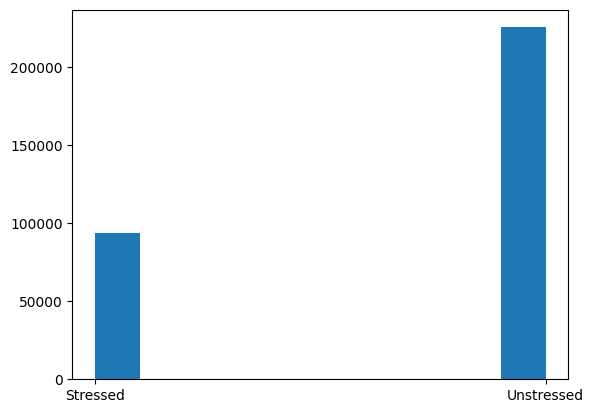

In [6]:
plt.hist(data["Emotion"])
plt.show()

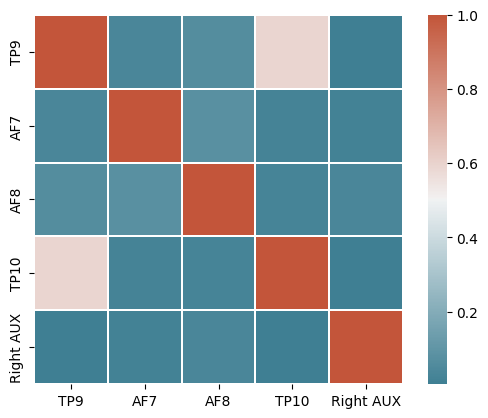

In [7]:
d = data.drop(columns = ["Emotion"], axis = 1)
plt.figure()
corr = d.corr(method="pearson")
c = sns.diverging_palette(220, 20, as_cmap = True)
sns.heatmap(corr, cmap = c, square = True, linewidths = 0.2)
plt.show()

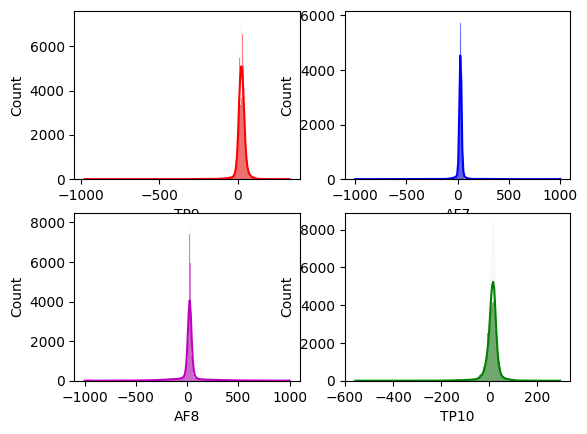

In [8]:
plt.figure()
plt.subplot(2,2,1)
sns.histplot(data["TP9"], kde = True, color = 'r')
plt.subplot(2,2,2)
sns.histplot(data["AF7"], kde = True, color = 'b')
plt.subplot(2,2,3)
sns.histplot(data["AF8"], kde = True, color = 'm')
plt.subplot(2,2,4)
sns.histplot(data["TP10"], kde = True, color = 'g')
plt.show()

In [9]:
stressed_data = data[data["Emotion"] == "Stressed"]
unstressed_data = data[data["Emotion"] == "Unstressed"]

In [10]:
unstressed_data.shape

(225792, 6)

In [11]:
stressed_data = stressed_data.iloc[:10000]
unstressed_data = pd.concat([unstressed_data.iloc[:5000], unstressed_data.iloc[-5000:]])

print(stressed_data.shape)
print(unstressed_data.shape)

(10000, 6)
(10000, 6)


In [12]:
data = pd.concat([stressed_data, unstressed_data])
data.head()

,TP9,AF7,AF8,TP10,Right AUX,Emotion
0,59.105,28.320,15.137,12.207,54.199,Stressed
1,62.012,30.273,43.945,11.719,79.102,Stressed
2,44.922,30.273,-97.656,11.230,32.715,Stressed
3,28.809,27.832,-110.352,9.277,29.785,Stressed
4,36.156,28.809,-73.242,11.230,50.781,Stressed


In [13]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data["Emotion"] = le.fit_transform(data["Emotion"])

In [14]:
data.head()

,TP9,AF7,AF8,TP10,Right AUX,Emotion
0,59.105,28.320,15.137,12.207,54.199,0
1,62.012,30.273,43.945,11.719,79.102,0
2,44.922,30.273,-97.656,11.230,32.715,0
3,28.809,27.832,-110.352,9.277,29.785,0
4,36.156,28.809,-73.242,11.230,50.781,0


In [15]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split

In [16]:
X = data.drop(columns = ["Emotion"])
Y = data["Emotion"]

In [17]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)

In [18]:
X_train, X_test,  Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 42)

print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(14000, 5)
(6000, 5)
(14000,)
(6000,)


In [19]:
svm_model = SVC(kernel='rbf', C = 1000, gamma = 0.001, probability = True, random_state=42)

In [20]:
svm_model.fit(X_train, Y_train)

SVC(C=1000, gamma=0.001, probability=True, random_state=42)

In [21]:
y_pred = svm_model.predict(X_test)

In [22]:
accuracy = accuracy_score(Y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 92.82%


In [23]:
 print(le.inverse_transform(y_pred))

['Unstressed' 'Stressed' 'Stressed' ... 'Unstressed' 'Unstressed'
 'Unstressed']


In [24]:
cm = confusion_matrix(Y_test, y_pred)
print("\nClassification Report:")
print(classification_report(Y_test, y_pred, target_names=le.classes_))


Classification Report:
              precision    recall  f1-score   support

    Stressed       0.96      0.89      0.93      3017
  Unstressed       0.90      0.97      0.93      2983

    accuracy                           0.93      6000
   macro avg       0.93      0.93      0.93      6000
weighted avg       0.93      0.93      0.93      6000



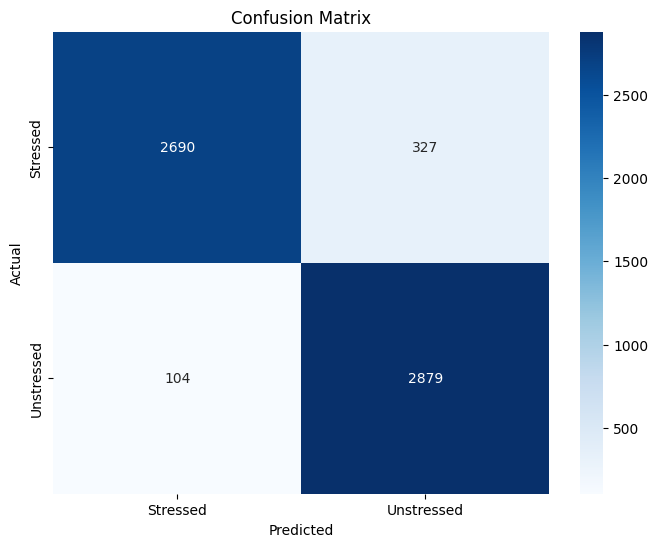

In [25]:
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=le.classes_, yticklabels=le.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [26]:
y_val_proba = svm_model.predict_proba(X_test)
y_val_pred = svm_model.predict(X_test)

In [27]:
print(y_val_proba)

[[1.16199668e-02 9.88380033e-01]
 [9.99999571e-01 4.28889719e-07]
 [9.99999900e-01 1.00000010e-07]
 ...
 [4.05859191e-02 9.59414081e-01]
 [6.53078520e-02 9.34692148e-01]
 [3.99392165e-01 6.00607835e-01]]


In [28]:
from sklearn.metrics import log_loss
validation_loss = log_loss(Y_test, y_val_proba)

In [29]:
print(f"Validation Loss (Log Loss): {validation_loss:.4f}")

Validation Loss (Log Loss): 0.1786
